In [1]:
import numpy as np 
from cleanplots import *

In [2]:
mi_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/patch_size_sweep/'

In [3]:
num_patches = 10000
val_set_size = 1000
test_set_size = 1500
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20

mean_photon_count_list = [100]
mean_photon_count = mean_photon_count_list[0]

dataset_name = 'cifar10'

In [4]:
psf_name = 'five'

patch_sizes = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34]

save_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'



In [5]:
axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

Mi values are: [np.float64(0.6762208411953502), np.float64(0.4071889102487334), np.float64(0.3371079955986035), np.float64(0.30463805631470886), np.float64(0.29078283294921653), np.float64(0.27074346868105276), np.float64(0.2647025710726794), np.float64(0.25896381869557566), np.float64(0.2505080437230776), np.float64(0.24371029996531937), np.float64(0.24376561182521675), np.float64(0.242018181511441), np.float64(0.24067303502495496), np.float64(0.2312203240542271), np.float64(0.23254240825252573), np.float64(0.2281947882018653), np.float64(0.22797628638845685)]


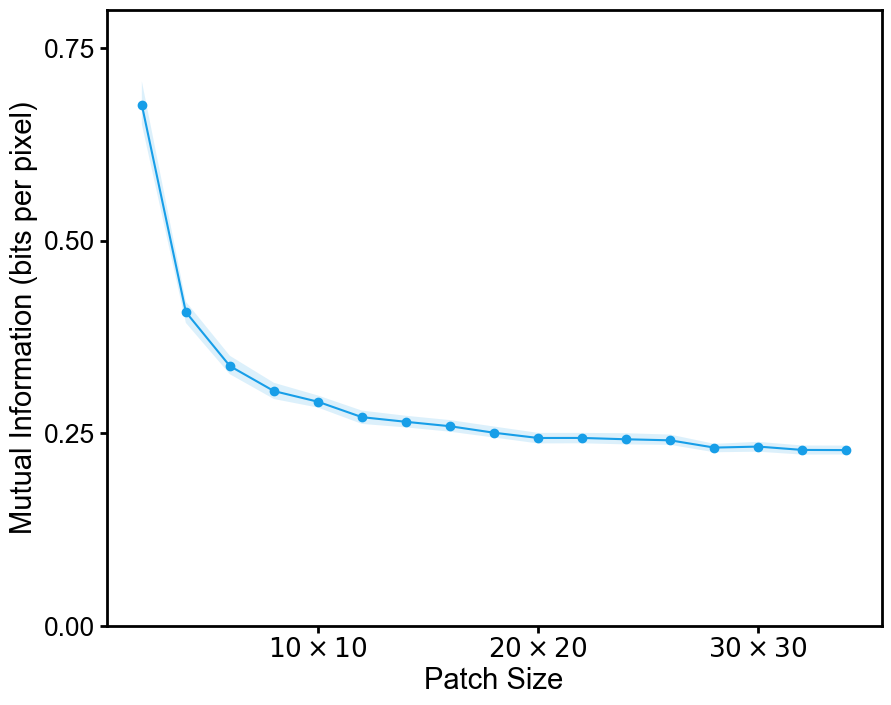

In [6]:
plt.figure(figsize=(10, 8))

for psf_name in ['five']:
    mi_vals = []
    mi_lowers = []
    mi_uppers = []
    for patch_size in patch_sizes:
        mi_estimates = np.load(mi_dir + '{}_pixelcnn_mi_estimate_{}_photons_{}_psf_{}_patch_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(dataset_name, mean_photon_count, psf_name, patch_size, learning_rate, patience_val, num_iters_per_epoch))
        best_mi_value, best_mi_idx = np.min(mi_estimates[0]), np.argmin(mi_estimates[0])
        best_mi_lower_bound = mi_estimates[1][best_mi_idx]
        best_mi_upper_bound = mi_estimates[2][best_mi_idx]
        mi_vals.append(best_mi_value)
        mi_lowers.append(best_mi_lower_bound)
        mi_uppers.append(best_mi_upper_bound)

    print("Mi values are:", mi_vals)
    plt.plot(patch_sizes, mi_vals, '-o')
    plt.fill_between(patch_sizes, mi_lowers, mi_uppers, alpha=error_bar_transparency)
    plt.ylim([0, .8])
    plt.xlabel("Patch Size", fontsize=axis_label_fontsize)
    plt.ylabel("Mutual Information (bits per pixel)", fontsize=axis_label_fontsize)
    plt.xticks([10, 20, 30], [r'$10\times10$', r"$20\times20$", r"$30\times30$"], fontsize=tick_fontsize)
    plt.yticks([0, 0.25, 0.5, 0.75], fontsize=tick_fontsize)
    plt.savefig(save_dir + "patch_size_sweep.pdf", transparent=True, bbox_inches='tight')